In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('dataset2').sheet1
data = worksheet.get_all_values()

In [ ]:
#ABINAYA S
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'x':'float'})
dataset1 = dataset1.astype({'y':'float'})
dataset1.head(20)


,x,y
0,1.0,12.0
1,2.0,22.0
2,3.0,32.0
3,4.0,42.0
4,5.0,52.0
5,6.0,62.0
6,7.0,72.0
7,8.0,82.0
8,9.0,92.0
9,10.0,102.0


In [ ]:
X = dataset1[['x']].values
y = dataset1[['y']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler. fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([Dense(8,activation = 'relu',input_shape=[1]),
                       Dense(10,activation = 'relu'),
                       Dense(1)])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

ai_brain.fit(X_train1, y_train,epochs =2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13294.1699
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13289.3145
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13286.1074
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13283.5488
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13281.2744
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13279.2285
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13277.3135
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13275.4854
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13273.7549
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13272.0986
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13270.4863
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13268.9160
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13267.4043
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13265.9277
Epoch 15/2000
1/1

<Axes: >

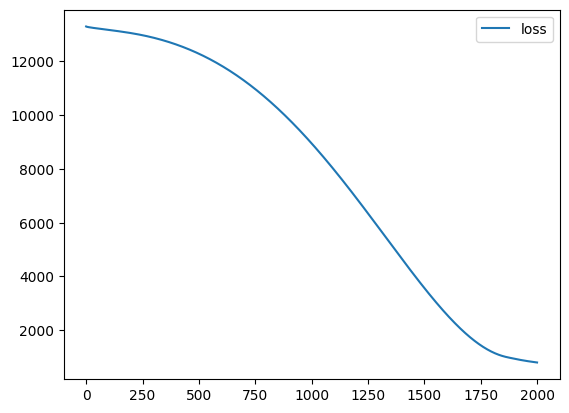

In [ ]:
#ABINAYA S
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
#ABINAYA S
X_test1 = Scaler.transform(X_test)

ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 969.0873


969.0872802734375

In [ ]:
#ABINAYA S
X_n1 = [[9]]

X_n1_1 = Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[103.25358]], dtype=float32)